# MLP Model 학습 (iris 데이터 분류): Keras 사용

## 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### 변수 설명

SepalLengthCm: 꽃받침 길이  
SepalWidthCm: 꽃받침 너비  
PetalLengthCm: 꽃잎 길이  
PetalWidthCm: 꽃잎 너비  
Species: 꽃의 종류 (setosa / versicolor / virginica)  

## 데이터 전처리

### 데이터를 numpy 배열로 만들기

In [3]:
import numpy as np

In [4]:
# 타겟값(Species)을 제외한 독립변수 넘파이 배열로 변환
X = df.drop('Species', axis=1).to_numpy()

### MinMaxScaler로 데이터 스케일링

In [5]:
from sklearn.preprocessing import MinMaxScaler 

In [6]:
scaler = MinMaxScaler() 
scaler.fit(X) 
X = scaler.transform(X)

### LabelEncoder로 target 전처리

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [8]:
Y = df['Species']

In [9]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# 타겟 값 one-hot encoding
Y = to_categorical(Y)

### train test 나누기

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

## 모델 구축

In [12]:
from keras import models, layers
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [13]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(Dropout(0.2))
  model.add(layers.Dense(3, activation='softmax'))
  model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

## 모델 학습

In [14]:
model = build_model()
history = model.fit(X_train, Y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 497us/step - loss: 1.0644 - accuracy: 0.4667
Epoch 2/100
10/10 [==============================] - 0s 394us/step - loss: 1.0321 - accuracy: 0.5733
Epoch 3/100
10/10 [==============================] - 0s 499us/step - loss: 0.9567 - accuracy: 0.7467
Epoch 4/100
10/10 [==============================] - 0s 387us/step - loss: 0.9235 - accuracy: 0.7467
Epoch 5/100
10/10 [==============================] - 0s 396us/step - loss: 0.8931 - accuracy: 0.7067
Epoch 6/100
10/10 [==============================] - 0s 399us/step - loss: 0.8556 - accuracy: 0.7333
Epoch 7/100
10/10 [==============================] - 0s 484us/step - loss: 0.7887 - accuracy: 0.7467
Epoch 8/100
10/10 [==============================] - 0s 496us/step - loss: 0.7695 - accuracy: 0.6933
Epoch 9/100
10/10 [==============================] - 0s 425us/step - loss: 0.7149 - accuracy: 0.7600
Epoch 10/100
10/10 [==============================] - 0s 490us/step - loss: 0.6689 - accura

10/10 [==============================] - 0s 399us/step - loss: 0.1685 - accuracy: 0.9333
Epoch 82/100
10/10 [==============================] - 0s 399us/step - loss: 0.1764 - accuracy: 0.9333
Epoch 83/100
10/10 [==============================] - 0s 399us/step - loss: 0.2174 - accuracy: 0.9200
Epoch 84/100
10/10 [==============================] - 0s 399us/step - loss: 0.1390 - accuracy: 0.9333
Epoch 85/100
10/10 [==============================] - 0s 420us/step - loss: 0.1305 - accuracy: 0.9733
Epoch 86/100
10/10 [==============================] - 0s 402us/step - loss: 0.1559 - accuracy: 0.9733
Epoch 87/100
10/10 [==============================] - 0s 499us/step - loss: 0.1653 - accuracy: 0.9467
Epoch 88/100
10/10 [==============================] - 0s 394us/step - loss: 0.1343 - accuracy: 0.9600
Epoch 89/100
10/10 [==============================] - 0s 396us/step - loss: 0.1424 - accuracy: 0.9600
Epoch 90/100
10/10 [==============================] - 0s 520us/step - loss: 0.1675 - accuracy: 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


### 성능 시각화

In [16]:
import matplotlib.pyplot as plt

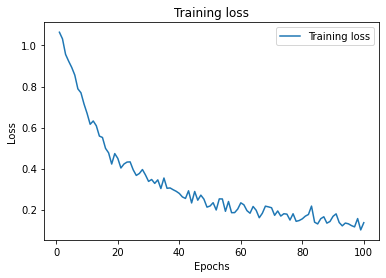

In [17]:
# loss 시각화
loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

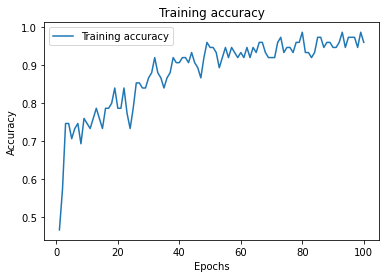

In [18]:
# accuracy 시각화
accuracy = history.history['accuracy']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, label='Training accuracy')
plt.title("Training accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 모델 평가

In [19]:
test_CE_score = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 342us/step - loss: 0.0980 - accuracy: 0.9600


In [20]:
print(f"test_CE_score = {test_CE_score}")
# loss값, accuracy값

test_CE_score = [0.09801459312438965, 0.9599999785423279]
